<h1>Lets import all the necessary modules we will need </h1>

In [51]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import seaborn as sns
import pywt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

<h2>First we need to get all the images and store them into a dataset</h2>

In [2]:
star_names = os.listdir("./cropped_pictures")
indices =  range(len(star_names))
print(star_names)

star_names_dict = {value:index for index, value in zip(indices, star_names)}
star_names_dict

['cristiano_ronaldo', 'lionel_messi', 'luka_modric', 'mohamed_salah', 'ronaldinho']


{'cristiano_ronaldo': 0,
 'lionel_messi': 1,
 'luka_modric': 2,
 'mohamed_salah': 3,
 'ronaldinho': 4}

In [3]:
def resize_img(img):
    dimension = (32, 32)
    return cv.resize(img, dimension, interpolation=cv.INTER_AREA)

./cropped_pictures/cristiano_ronaldo\cristiano_ronaldo1.jpg


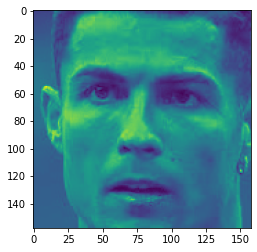

In [4]:
# lets go thought the cropped_pictures and convert them to 1D array from 2D array after converting them to 80 * 80 picture

for star_name in star_names:
    path = './cropped_pictures/' + star_name
    for img_path in os.scandir(path):
        img = cv.imread(img_path.path)
        gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        new_img = resize_img(gray_img).flatten()
        print(img_path.path)
        plt.imshow(gray_img)
        plt.show()
        break
        
    break
    

In [53]:
# to resize the picture
def resize_img(img):
    dimension = (32, 32)
    return cv.resize(img, dimension, interpolation=cv.INTER_AREA)

# the get wavelet image which is the best way to get important features from a image
def w2d(img, mode='haar', level=1):
    imArray = cv.imread(img)
    #Datatype conversions
    #convert to grayscale
    imArray = cv.cvtColor( imArray,cv.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)
    return resize_img(imArray_H).flatten()

def get_flattend_img(path):
    img = cv.imread(path)
    new_img = resize_img(img)
    scaled_img = np.reshape(new_img, (32*32*3, ))
    return scaled_img


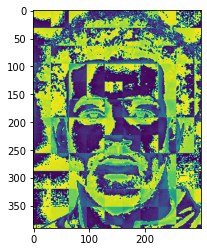

In [13]:
plt.imshow(w2d("./football_players/mohamed_salah/67b1ff474b.jpg", 'db1', 5))
plt.show()

In [16]:
df = pd.DataFrame()

for star_name in star_names:
    path = './cropped_pictures/' + star_name
    for img_path in os.scandir(path):
        star_code = star_names_dict[star_name]
        img_array = get_flattend_img(img_path.path) # getting resized and flattend image
        wevlet_array = w2d(img_path.path, 'db1', 5) #getting wavelet function
        
        df_array = np.concatenate((img_array, wevlet_array, [star_code])) # two x_values and one y value together
        temp_df = pd.DataFrame([df_array])
        df = pd.concat([df, temp_df], ignore_index=True)
        
df.rename(columns={4096: 'stars'}, inplace=True)
df.sample(5)

0    1    2    3    4    5    6    7    8    9  ...  4087  4088  4089  \
17   49   64   89   49   61   83   51   59   78   54  ...   177    17    47   
63   41   78   83   34   63   67   37   70   77   21  ...    90   164   191   
5   255  255  255  255  255  254  251  253  253  207  ...   139   112   130   
56   62   99   82   61   99   81   60   98   81   60  ...   154    79    94   
58   67   67   75   67   67   76   65   67   75   65  ...   111   106    32   

    4090  4091  4092  4093  4094  4095  stars  
17    14   159   251   250   231    72      0  
63   228   190    76    88    34    87      2  
5    162   151    83    84    85    51      0  
56   116    55    37   207   242   108      2  
58    50   130   156   124   100   103      2  

[5 rows x 4097 columns]

In [13]:
df.shape

(146, 4097)

In [17]:
# lets save the file so that we can use it later
df.to_csv("./model/face_dataset.csv")

In [18]:
# lets get x and y values from the dataset
x = df.drop('stars', axis=1).values
y = df['stars'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15)

In [19]:
x_train.shape

(116, 4096)

In [20]:
# lets scale the data for better accuracy

In [21]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255
x_train_scaled

array([[0.33333333, 0.36862745, 0.35294118, ..., 0.53333333, 0.43921569,
        0.26666667],
       [0.23921569, 0.19607843, 0.09411765, ..., 0.09019608, 0.05098039,
        0.05882353],
       [0.35686275, 0.35686275, 0.45882353, ..., 0.65490196, 0.29019608,
        0.45490196],
       ...,
       [0.12156863, 0.12156863, 0.11764706, ..., 0.65882353, 0.96862745,
        0.90980392],
       [0.14117647, 0.13333333, 0.12156863, ..., 0.93333333, 0.3254902 ,
        0.69411765],
       [0.18823529, 0.20784314, 0.21960784, ..., 0.4745098 , 0.12941176,
        0.53333333]])

In [11]:
# lets see which models perfoms better(just a basic overview)

In [22]:
models = [RandomForestClassifier(), LogisticRegression(max_iter=4000), SVC(), DecisionTreeClassifier(), KNeighborsClassifier(), 
          MultinomialNB()]

# cross val score randomly takes x_train, y_train to train them with a model gives us the score in return
for model in models:
    scores = cross_val_score(model, x_train_scaled, y_train, cv=6)
    print(f'{model} model scores: {np.round(scores, 2)} and mean score of {round(np.mean(scores), 2)}')
    print()
    

RandomForestClassifier() model scores: [0.65 0.7  0.74 0.74 0.74 0.68] and mean score of 0.71

LogisticRegression(max_iter=4000) model scores: [0.6  0.75 0.84 0.79 0.95 0.84] and mean score of 0.8

SVC() model scores: [0.65 0.6  0.84 0.68 0.74 0.68] and mean score of 0.7

DecisionTreeClassifier() model scores: [0.45 0.55 0.58 0.42 0.42 0.63] and mean score of 0.51

KNeighborsClassifier() model scores: [0.5  0.55 0.74 0.42 0.58 0.63] and mean score of 0.57

MultinomialNB() model scores: [0.7  0.5  0.79 0.74 0.74 0.63] and mean score of 0.68



<h1>It seems that RandomForest, Logistic Regression and SVC is giving very good score which can be found using RandomizedSearchCV to reduce to computation cost </h1>

In [23]:
algo_model = {
    
    "RandomForest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [10, 30, 50, 100, 150, 200],
            "criterion" : ['gini', 'entropy']    
        }
    },
    
    "LogisticRegression": {
        "model": LogisticRegression(),
        "params": {
            "C": [1.0, 3.0, 5.0, 8.0],
            "max_iter": [3000, 4000, 5000, 8000]
        }
    },
    
    "SVC": {
        "model": SVC(),
        "params": {
            "C": [1.0, 3.0, 5.0, 8.0],
            "gamma": ['scale', "auto"],
            "kernel": ['linear', 'poly', 'rbf', 'sigmoid']
        }
    }  
    
}

In [28]:
# checking if things are working

In [27]:
alg_mod = algo_model['LogisticRegression']
clf = RandomizedSearchCV(alg_mod["model"], alg_mod["params"], cv=7, return_train_score=False)
clf.fit(x_train_scaled, y_train)
pd.DataFrame(clf.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.921392      0.191571         0.000429        0.000496   
1       0.858119      0.245092         0.000573        0.000496   
2       0.977235      0.292142         0.000430        0.000496   
3       0.885814      0.206098         0.000286        0.000453   
4       1.026390      0.370514         0.000573        0.000496   
5       0.777358      0.126344         0.000430        0.000496   
6       0.808504      0.166608         0.000716        0.000453   
7       0.761518      0.152330         0.000429        0.000496   
8       1.008340      0.309511         0.000430        0.000496   
9       0.857076      0.222081         0.000572        0.000495   

  param_max_iter param_C                        params  split0_test_score  \
0           8000       5  {'max_iter': 8000, 'C': 5.0}           0.529412   
1           3000       1  {'max_iter': 3000, 'C': 1.0}           0.529412   
2           8000       3  {'max_iter': 8000, 'C': 3.0}           0.529412   
3           5000       5  {'max_iter': 5000, 'C': 5.0}           0.529412   
4           5000       3  {'max_iter': 5000, 'C': 3.0}           0.529412   
5           5000       8  {'max_iter': 5000, 'C': 8.0}           0.529412   
6           8000       8  {'max_iter': 8000, 'C': 8.0}           0.529412   
7           4000       8  {'max_iter': 4000, 'C': 8.0}           0.529412   
8           3000       3  {'max_iter': 3000, 'C': 3.0}           0.529412   
9           4000       1  {'max_iter': 4000, 'C': 1.0}           0.529412   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.705882           0.941176           0.882353             0.6875   
1           0.705882           0.941176           0.882353             0.7500   
2           0.705882           0.941176           0.882353             0.7500   
3           0.705882           0.941176           0.882353             0.6875   
4           0.705882           0.941176           0.882353             0.7500   
5           0.764706           0.941176           0.941176             0.6875   
6           0.764706           0.941176           0.941176             0.6875   
7           0.764706           0.941176           0.941176             0.6875   
8           0.705882           0.941176           0.882353             0.7500   
9           0.705882           0.941176           0.882353             0.7500   

   split5_test_score  split6_test_score  mean_test_score  std_test_score  \
0                1.0             0.8125         0.794118        0.151827   
1                1.0             0.7500         0.794118        0.148106   
2                1.0             0.8125         0.803046        0.147057   
3                1.0             0.8125         0.794118        0.151827   
4                1.0             0.8125         0.803046        0.147057   
5                1.0             0.8125         0.810924        0.154135   
6                1.0             0.8125         0.810924        0.154135   
7                1.0             0.8125         0.810924        0.154135   
8                1.0             0.8125         0.803046        0.147057   
9                1.0             0.7500         0.794118        0.148106   

   rank_test_score  
0                7  
1                7  
2                4  
3                7  
4                4  
5                1  
6                1  
7                1  
8                4  
9                7

In [29]:
best_estimators = {}
best_scores = []

for model_name, model in algo_model.items():
    print(model_name)
    clf = GridSearchCV(model['model'], model['params'], cv=6, return_train_score=False)
    clf.fit(x_train_scaled, y_train)
    best_scores.append({"algo": model_name, "best_params": clf.best_params_, "best_score": clf.best_score_})
    best_estimators[model_name] = clf.best_estimator_

RandomForest
LogisticRegression
SVC


In [30]:
pd.DataFrame(best_scores)

algo                                    best_params  \
0        RandomForest  {'criterion': 'entropy', 'n_estimators': 150}   
1  LogisticRegression                   {'C': 3.0, 'max_iter': 3000}   
2                 SVC  {'C': 3.0, 'gamma': 'scale', 'kernel': 'rbf'}   

   best_score  
0    0.769298  
1    0.812281  
2    0.793860

In [31]:
# taking the best model out of them
model = best_estimators['LogisticRegression']
model

LogisticRegression(C=3.0, max_iter=3000)

In [32]:
model.score(x_test_scaled, y_test)

0.8

lets see where we were wrong

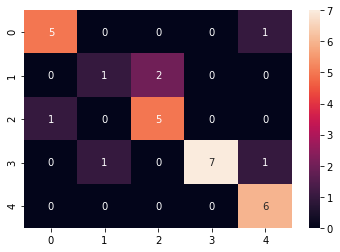

In [33]:
sns.heatmap(confusion_matrix(y_test, model.predict(x_test_scaled)), annot=True)
plt.show()

<h1>Although the model was not 100 percent correct we were able to get 80 percent accuracy which is not that bad</h1>

<p> Now lets save the model as a pickle file</p>

In [34]:
import pickle

with open('./model/face_detection.pickle', "wb") as file:
    pickle.dump(model, file)

In [50]:
# lets load the model to see if it works
import pickle
with open("./model/face_detection.pickle", "rb") as file:
    model = pickle.load(file)

In [56]:
star_names = os.listdir("./cropped_pictures")
indices =  range(len(star_names))
print(star_names)

stars = {index:value for index, value in zip(indices, star_names)}
print(stars)

['cristiano_ronaldo', 'lionel_messi', 'luka_modric', 'mohamed_salah', 'ronaldinho']
{0: 'cristiano_ronaldo', 1: 'lionel_messi', 2: 'luka_modric', 3: 'mohamed_salah', 4: 'ronaldinho'}


lionel_messi


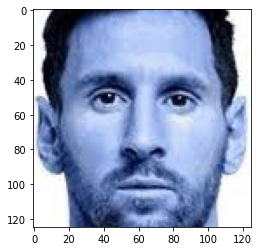

In [71]:
path = './cropped_pictures/lionel_messi\lionel_messi169.jpg' 
img = cv.imread(path)
plt.imshow(img)

img_array = get_flattend_img(path)
wevlet_array = w2d(path, 'db1', 5)
        
array = np.concatenate((img_array, wevlet_array))
        
new_array = np.reshape(array, (1, len(array)))
new_array = new_array/255
y_pred = model.predict(new_array)

print(stars[y_pred[0]])

plt.show()

In [72]:
correct = 0
count = 0

# checking how many values are correct by going through all the face images

for star_name in star_names:
    path = './cropped_pictures/' + star_name
    for img_path in os.scandir(path):
        img_array = get_flattend_img(img_path.path)
        wevlet_array = w2d(img_path.path, 'db1', 5)
        
        array = np.concatenate((img_array, wevlet_array))
        
        new_array = np.reshape(array, (1, len(array)))
        new_array = new_array/255
        y_pred = model.predict(new_array)

        if star_name == stars[y_pred[0]]:
            correct += 1
            
        count += 1

print(f"Outof {count} picutures {correct} was correct")    

Outof 146 picutures 140 was correct


<h1>It seems our model is very accurate as it was able to get 140 pictures correct out of 146 pictures</h1>